# Entry ? - Gradient Descent

## Description

The general idea of Gradient Descent is to iteratively minimize the errors (usually using the mean squared error) to arrive at better and better solutions. Kind of like trial and error, where the new trial relies on the results of the last one.

The most common analogies for this method are rolling a ball down a hill or walking down a mountain.

This analogy is great for very simple cases where the residuals look like a 'U'. The algorithm settles and the bottom of the 'U' (where x=0 in the graph below) and everything is great.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

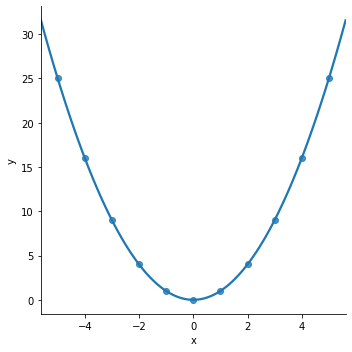

In [2]:
x = list(range(-5, 6))
y = [item**2 for item in x]
df = pd.DataFrame({'x': x, 'y': y})
sns.lmplot('x', 'y', data=df, order=2)

The basic concept is that the algorithm "steps" down the steepest slope, taking smaller and smaller "steps" as the slope evens out. Page 118 of [Hands-On Machine Learning with Scikit-Learn](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) has a visualization of this concept (O'Reilly kindly made the entirety of chapter 4 available as a [preview of the book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html). All the images from *Hands-On Machine Learning with Scikit-Learn* on Gradient Descent come from this preview):

<img src='../img/HOML_gradient_descent.png'>

The key here is the step size, called the *learning rate* or *alpha*. If the step size is too small it takes forever to converge on the best solution. If the step size is too big, it overshoots the best solution and ends up somewhere suboptimal or even worse than the starting point.

*Hands-On Machine Learning with Scikit-Learn* has good visualiztions of too small and too large steps on page 119:

<img src='../img/HOML_gradient_descent_small.png'>
<img src='../img/HOML_gradient_descent_big.png'>

## Purpose

As explained in <font color='red'>Entry ? (Regression)</font>, the purpose for the simplest case of Gradient Descent is just to find the best fit line.

Let's start with a simple one feature dataset. Here, `x` (`col_2`) is the feature and `y` (`col_3`) is the target (the value being predicted).

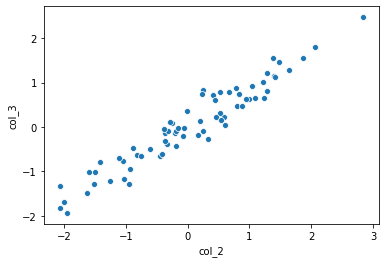

In [117]:
import openml
rabe_176 = openml.datasets.get_dataset(698).get_data()[0]
sns.scatterplot(x='col_2', y='col_3', data=rabe_176)

To get a base estimate for these data points, we could use the equation for a line: $y = mx + b$.

To obtain the values for the equation:

1. Pick two points
  - For this example, I'm going to use the points where the `col_2` values are the max and min: (x, y) = (2.8, 2.5) and (-2.1, -1.8)
2. Calculate the difference between the y points (the rise) and the difference between the x points (the run)
  - Rise: 2.5 - (-1.8) = 4.3
  - Run: 2.8 - (-2.1) = 4.9
3. The slope of the line is then $\frac{rise}{run}$ = $\frac{4.3}{4.9} = 0.88$
4. Determine the y-intercept (where y is 0)
  - $y = mx + b => b = y - mx = 2.5 - 0.88 \times 2.8 = 0.03$
  - Based on the chart above, this value seems reasonable
5. Finalize equation: $y = 0.88x + 0.03$

For this example, the hypothesized theta array would be [0.03, 0.88] (where $\theta_{0}$ is the y-intercept (i.e., b = 0.03) and $\theta_{1}$ is the slope or weight of the single feature (i.e., m = 0.88)).

Gradient Descent uses that hypothesized theta array, sees how far off it is (using the cost function), tweeks the values in the theta array (in the direction indicated by the partial derivatives and by the amount of the learning rate), and tries to come up with an answer that better fits *all* the data points.

*Note*, the theta array can be initialized using all 0s, random values, or a best guess. Just remember that whatever the theta array is, that's the hypothesized array, which Gradient Descent tries to improve upon.

Plausible values of theta (i.e., best guess) can be calculated and used as the starting point (i.e., find the theta array between two observations, just as I did above for the slope and y-intercept). This way the hypothesized theta array starts closer to the actual answer than if it were initialized from random. In no way is this required however. Gradient Descent can still converge on the solution from 0 or from random values.

## Behavior

As just mentioned, to find the best fit using Gradient Descent, the initial theta array can be set as a flat line, to random values, or to a best guess.

In the example below, I use an initial theta array with a slope of 0 (a horizontal or flat line) at the minimum observed target values (the min of the y or target array) to more easily visualize two characteristics of Gradient Descent:

1. Each iteration gets closer to the correct solution
2. The steps between the iterations get smaller

*Note*, code adapted from the [chapter four notebook](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb) in *Hands-On Machine Learning with Scikit-Learn*'s github repository.

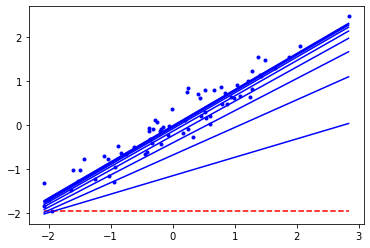

In [115]:
data = rabe_176[['col_2', 'col_3']]
X = data.iloc[:, 0]
y = data.iloc[:, 1]
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta = np.array([y.min(), 0])  # random initialization

def plot_gradient_descent(theta, eta):
    m = len(X)
    plt.plot(X, y, "b.")
    X_new = np.array([[X.min()], [X.max()]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    n_iterations = 10
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        style = "b-" if iteration > 0 else "r--"
        plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

plot_gradient_descent(theta, eta=.2)

## The Math

The basic idea of Gradient Descent is the easy part. Time to move into the actual math.

Gradient Descent isn't the easiest thing to understand. It took me a bit to work through initially (see the extent of my white board notes below). Then when I came back to it, I found I'd forgotten a good chunk. Don't get discouraged, just keep plugging away at it.

<img src='../img/gd_working_board.jpg' width="656" height="400">

Gradient Descent = $\theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)$

As hinted in the text of the sections above above, there are four main components to Gradient Descent. In order of how they appear in the equation, these components are:

- The theta array ($\theta$)
- The learning rate ($\alpha$)
- The partial derivative ($\frac{\partial}{\partial \theta_{j}}$)
- The cost function ($J(\theta)$)

### Theta array ($\theta$)

This is probably the easiest component to understand. The theta array is the list of weights to be applied to the features (one weight for each feature plus a y-intercept type term). For more on the theta array see the Purpose section of <font color='red'>Entry ? (Regression)</font> for Regression.

### Learning rate ($\alpha$)

The learning rate is the "step" size I talked about earlier. If they're too small it takes forever to reach the solution, if they're too big the solution could be bypassed.

### Partial derivative ($\frac{\partial}{\partial \theta_{j}}$)

Partial derivative comes from calculus. The premise is that you're looking for the direction to go when changing the theta array. For the first example with the U shaped data, the changes should go down the U toward the bottom - not up toward the open end.

### Cost function ($J(\theta)$)

Just like in the series of posts about model evaluation, the cost function gives a measure for how correct the predictions are in relation to the observed values.

### Examples

Here is a table of the name, symbol, dimensions, and data sctructure of the arrays/matrices used in the calculation:

<table align='left'>
    <tr>
        <td><b>Name</b></td>
        <td><b>Theta array / alpha / learning rate</b></td>
        <td><b>Target array</b></td>
        <td><b>Feature matrix</b></td>
    </tr>
    <tr>
        <td><b>Symbol</b></td>
        <td><b>$\theta$</b></td>
        <td><b>y</b></td>
        <td><b>X</b></td>
    </tr>
    <tr>
        <td><b>Dimensions</b></td>
        <td>(n+1 x 1)</td>
        <td>(m x 1)</td>
        <td>(m x n+1)</td>
    </tr>
    <tr>
        <td><b>Data Structure</b></td>
        <td>$\theta = \begin{bmatrix}
    \theta_{0} \\
    \theta_{1} \\
    \theta_{2} \\
    \dotsb \\
    \theta_{n}
    \end{bmatrix}$</td>
        <td>$y = \begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \dotsb \\
    y_{m}
    \end{bmatrix}$</td>
        <td>$X = \begin{bmatrix}
    1 & x_{1}^{1} & x_{2}^{1} & \dotsb & x_{n}^{1}\\
    1 & x_{1}^{2} & x_{2}^{2} & \dotsb & x_{n}^{2} \\
    1 & x_{1}^{3} & x_{2}^{3} & \dotsb & x_{n}^{3} \\
    \dotsb & \dotsb & \dotsb & \dotsb & \dotsb \\
    1 & x_{1}^{m} & x_{2}^{m} & \dotsb & x_{n}^{m}
    \end{bmatrix}$</td>
    </tr>
    <tr>
        <td><b>Structure pic</b></td>
        <td><img src='../img/gd_theta_array.jpg' width="209" height="250"/></td>
        <td><img src='../img/gd_target_array.jpg' width="201" height="250"/></td>
        <td><img src='../img/gd_matrix.jpg' width="343" height="250"/></td>
    </tr>
</table>

## Equation

The Gradient Descent equation can be written different ways. I'm including three variations, each of which makes it easier to understand certain concepts of Gradient Descent. The variation listed at the beginning of the Math section was the simplified version, which makes it easier to see the four basic components of Gradient Descent.

### Expanded Gradient Descent equation

This variation spells out all the different parts of the equation. When all the terms are explicitly spelled out it becomes easier to see underlying similarities like the one between MSE and the cost function ($\frac{1}{m} \sum(\hat{y}_{i} - y_{i})^2 = \frac{1}{m} \sum(h_{\theta}(x_{i}) - y_{i})^2 \approx \frac{1}{m} \sum(h_{\theta}(x^{(i)}) - y^{(i)})$

$\theta_{j} := \theta_{j} - \alpha \frac{1}{m}\displaystyle\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

Where:

- $\theta_{j}$: the specific feature being updated
- $:=$ is assignment (in Python it's like writing `==` instead of `=`)
- $\alpha$: alpha, the learning rate or step size
  - While the learning rate remains fixed, the step size will still get smaller because as the algorithm converges on a solution the partial derivative will get smaller, making the change to $\theta$ smaller (see Week 1: Video Gradient Descent Intuition)
- $m$: number of training examples
- $x^{(i)}$: the feature array of the *i*th observation
  - Ex: for health info for my pet, this array could look something like [63 lbs, 23" tall, 36" long]
- $h_{\theta}(x^{(i)})$: returns the predicted value for the *i*th observation
  - $h_{\theta}(x)$: a function that outputs a predicted value
  - $h_{0}(x) = \hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dotsb + \theta_{n}x_{n} = \theta^{T} x$
  - For the line example in the Purpose section, the function would be $h_{\theta}(x) = \hat{y} = 0.88X + 0.03$
  - In Linear Regression $h_{\theta}(x)$ is assumed to be a linear function
- $y^{(i)}$: the observed value for the *i*th observation

### Simplified Gradient Descent equation

The simplified version just condenses some of the terms. This makes it easier to see how changes to the cost function effect the overall equation. I also used this version for the Math secion to more easily see the four main components of Gradient Descent.

$\theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)$

Where:

- $\theta_{j}$: a specific value in the theta array
- $:=$ is assignment (in Python it's like writing `==`)
- $\alpha$: alpha, the learning rate or step size
- $\frac{\partial}{\partial \theta_{j}}$: partial derivative, i.e. direction of change for $\theta$
  - Basically we're looking for the biggest change downward
- $J(\theta)$: cost function (also written as: $J(\theta_{0}, \theta_{1}, \dotsb, \theta_{n})$)
  - Essentially, calculates the mean squared error (MSE)
  - The cost function is just a squared error function, which is why it's so much like MSE. The *Machine Learning course* has this to say about the cost function:
  > [It] takes an average difference (actually a fancier version of an average) of all results of the hypothesis with inputs from x's and the actual output y's.
  - $\frac{1}{2m}\displaystyle\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$
    - Where
      - *m* is the number of training examples
      - $x^{(i)}$ is the feature array of the *i*th observation
      - $h_{\theta}(x^{(i)})$ returns the predicted value for the *i*th observation
      - $y^{(i)}$ is the observed value for the *i*th observation
    - So, if we're finding the *mean* squared error, why are we multiplying by $\frac{1}{2m}$ instead of $\frac{1}{m}$? According to Andrew Ng in the [Machine Learning course](https://www.coursera.org/learn/machine-learning), multiplying by $\frac{1}{2}$ makes the math easier
      - If there was a Fail section, I'd put this there: at first I was like, $\frac{1}{2} \times m$ would simplify to $\frac{m}{2}$. Then I realized what he meant was $\frac{1}{2} \times \frac{1}{m}$ which simplifies to $\frac{1}{2m}$
      - In the vectorized equation, *Hands-On Machine Learning with Scikit-Learn* uses $\frac{2}{m}$. Why? I have no idea
      - Regardless, whether the "mean" is $\frac{1}{m}$, $\frac{1}{2m}$, or $\frac{2}{m}$, ultimately solution will converge to the same answer because we're looking for where this value is minimized
        - Ex: The minimum of [1, 8, 6, 5, 4, 5, 7] finds the same index as the minimum of [0.5, 4, 3, 2.5, 2, 2.5, 3.5]
    - For more than one feature the partial derivative for the cost function changes slightly
        - $\frac{\partial}{\partial \theta_{j}} J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$
          - Where the j in $\theta_{j}$ is the weight for a specific feature being updated
          - Note that the "squared" portion of the term has disappeared from the $J(\theta)$ portion of the equation and instead is multiplied by $x_{j}^{(i)}$
          - This is why the cost function portion of the full equation looks different from the straight cost function

### Vectorized Gradient Descent equation

The vectorized version can be applied to the full dataset at once instead of row by row. This variation is from *Hands-On Machine Learning with Scikit-Learn* instead of the *Machine Learning* course, so the notation is slightly different.

$\theta^{\text{next step}} = \theta - \eta \frac{2}{m}X^{T}(X \theta -y)$

Where

- $\theta$: the theta array
- $\eta$: eta, the learning rate (previously notated as $\alpha$)
- $X$: input feature matrix
- $X^{T}$: the transpose of $X$
- $y$: the array of target values

Making the notation consistent with the other two variations, the equation would look like this:

$\theta_{j} := \theta_{j} - \alpha \frac{2}{m}X^{T}(X \theta - y)$

Breaking out the pieces of the equation helps us see where the four main components are:

Gradient descent: $\theta^{\text{next step}} = \theta - \eta \nabla_{\theta} MSE(\theta)$
- Theta array
  - Still written as $\theta$
- Learning rate
  - Previously we had notated the learning rate as $\alpha$, whereas in this equation it's written as $\eta$
- Partial derivative of the cost function
  - $\frac{\partial}{\partial \theta_{j}} MSE(\theta) = \frac{2}{m} \displaystyle\sum_{i=1}^m (\theta^{T}x^{(i)} - {y}^{(i)})x_{j}^{(i)}$
  - Previously we had notated the cost function as $J(\theta)$, whereas in this equation it's written as $MSE(\theta)$
  - The vectorized version is notated as: $\nabla_{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X \theta - y)$
- Cost function
  - $MSE(\theta) = \frac{1}{m} \displaystyle\sum_{i=1}^m (\theta^{T}x^{(i)} - {y}^{(i)})^{2}$
  - Previously we had notated the cost function as $J(\theta)$, whereas in this equation it's written as $MSE(\theta)$

## Caveats

As additional dimensions (i.e., features) are added, the situation becomes more complicated and the limitations of gradient descent become apparent.

Aurelion puts it this way on page 119 of *Hands-On Machine Learning with Scikit-Learn*:

> [...] not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult. Figure 4-6 shows the two main challenges with Gradient Descent. If the random initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as the *global minimum*. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

<img src='../img/HOML_gradient_descent_pitfalls.png'>

My takeaway questions on the challenges of Gradient Descent are:

- How would gradient descent find the optimal solution in a situation like the below graph?
- Is there even a single best solution?
- What makes one valley better than the valley beside it?
- If the step size is too small, what's to stop the algorithm from getting stuck in one of those local keyhole valleys at the top?
- If the step size is too big, what's to stop it from missing the optimal solution and going up another slope to get stuck at a local minimum?

These are addressed via hyperparameter optimization, which will be covered in another entry.

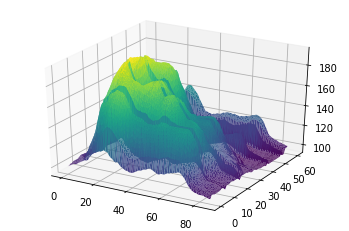

In [4]:
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

## Strengths and Weaknesses

- By using the mean in the cost function, the full training dataset is used at every step. As such, this implementation is called "Batch" Gradient Descent
- Scaling the features allows Gradient Descent to converge on a solution faster
  - If features are close in range (i.e., -1 to 1 or -3 to 3) it shouldn't really effect convergence
  - If features vary widely in range (i.e., -1 to 1 and -100 to 100; -1 to 1 and -0.0001 to 0.0001) they will effect convergence
  - Seems like features should probably be scaled if they're more than an order of magnitude different (multiple of 10), but otherwise can probably be left alone
- While it is pointed out that it would seem there would be a problem of getting stuck at a local optimization (instead of the best global solution), Gradient Descent is a convex function, which means it will always find the global minimum

## Resources

Andrew Ng does a fantastic job of covering the theory and practicalities of Gradient Descent in weeks 1 and 2 of his [Machine Learning course](https://www.coursera.org/learn/machine-learning) on coursera. For more details, watch the videos, read the notes, and (most telling) take the quizes for those two weeks.

- [Hands-On Machine Learning with Scikit-Learn](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Machine Learning course](https://www.coursera.org/learn/machine-learning)
- [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
- [The Python Math Library](https://stackabuse.com/the-python-math-library/)
- [mplot3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [pandas matrix dot product failed for the two matrix having the same dimension - pandas](https://html.developreference.com/article/12561922/pandas+matrix+dot+product+failed+for+the+two+matrix+having+the+same+dimension)
- [Beyond data scientist: 3d plots in Python with examples](https://medium.com/@yzhong.cs/beyond-data-scientist-3d-plots-in-python-with-examples-2a8bd7aa654b)
- [#371 Surface plot](https://python-graph-gallery.com/371-surface-plot/)
